# 確率分布

## 離散確率分布

### ベルヌーイ分布

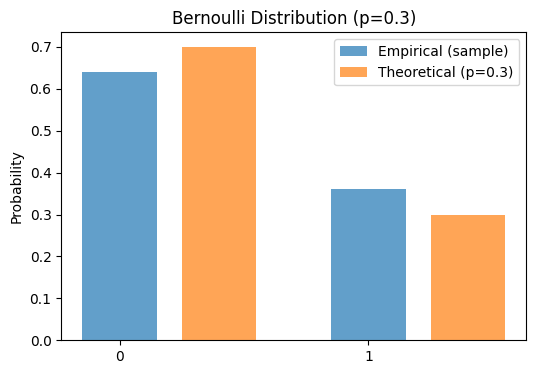

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータ p (1が出る確率)
p = 0.3  

# サンプル数
N = 100

# ベルヌーイ分布からサンプルを生成
samples = np.random.binomial(1, p, size=N)

# 相対頻度を計算
values, counts = np.unique(samples, return_counts=True)
probs = counts / N

# 理論値
theoretical = [1-p, p]

# 可視化
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(values, probs, width=0.3, label="Empirical (sample)", alpha=0.7)
ax.bar(values+0.4, theoretical, width=0.3, label="Theoretical (p=0.3)", alpha=0.7)

ax.set_xticks([0, 1])
ax.set_xticklabels(["0", "1"])
ax.set_ylabel("Probability")
ax.set_title("Bernoulli Distribution (p=0.3)")
ax.legend()
plt.show()


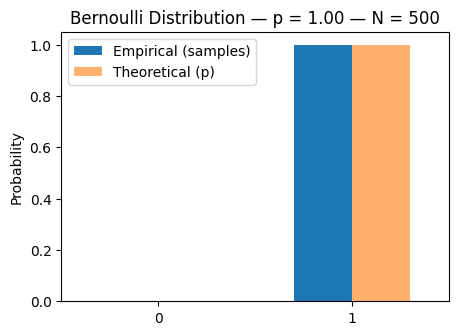

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# --- Bernoulli distribution animation (p sweep) ---
p_values = np.linspace(0.0, 1.0, 41)  # p from 0.0 to 1.0 inclusive
N_anim = 500  # samples per frame in the animation

fig_anim, ax_anim = plt.subplots(figsize=(5, 3.5))
ax_anim.set_xlim(-0.5, 1.5)
ax_anim.set_ylim(0, 1.05)
ax_anim.set_xticks([0, 1])
ax_anim.set_xticklabels(["0", "1"])
ax_anim.set_ylabel("Probability")
title = ax_anim.set_title("")

# Bars
x_emp = np.array([0, 1]) - 0.15
x_theo = np.array([0, 1]) + 0.15
width = 0.3
emp_bars = ax_anim.bar(x_emp, [0, 0], width=width)
theo_bars = ax_anim.bar(x_theo, [0, 0], width=width, alpha=0.6)
ax_anim.legend(["Empirical (samples)", "Theoretical (p)"])


def update(frame):
    p = p_values[frame]
    samples = np.random.binomial(1, p, size=N_anim)
    values, counts = np.unique(samples, return_counts=True)
    probs = np.zeros(2)
    probs[values.astype(int)] = counts / N_anim
    theo = np.array([1 - p, p])
    for rect, h in zip(emp_bars, probs):
        rect.set_height(h)
    for rect, h in zip(theo_bars, theo):
        rect.set_height(h)
    title.set_text(f"Bernoulli Distribution — p = {p:.2f} — N = {N_anim}")
    return list(emp_bars) + list(theo_bars) + [title]


anim = FuncAnimation(fig_anim, update, frames=len(p_values), interval=120, blit=True)

# Notebook 内に埋め込み
HTML(anim.to_jshtml())


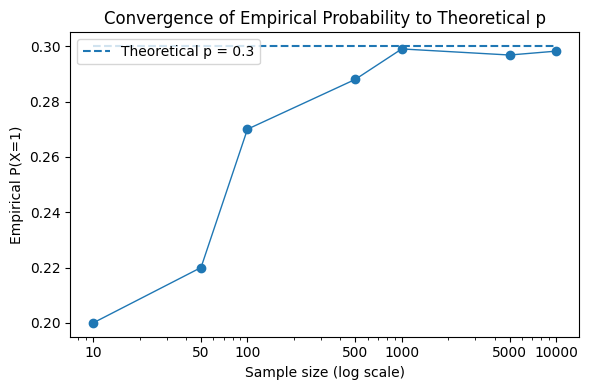

In [5]:
# --- Convergence plot ---
p_fixed = 0.3
sample_sizes = [10, 50, 100, 500, 1000, 5000, 10000]
empirical_probs = []

rng = np.random.default_rng(12345)  # reproducibility

for n in sample_sizes:
    samples = rng.binomial(1, p_fixed, size=n)
    empirical_probs.append(samples.mean())

fig_conv, ax_conv = plt.subplots(figsize=(6, 4))
ax_conv.plot(sample_sizes, empirical_probs, marker="o", linewidth=1)
ax_conv.hlines(
    p_fixed,
    sample_sizes[0],
    sample_sizes[-1],
    linestyles="dashed",
    label=f"Theoretical p = {p_fixed}",
)
ax_conv.set_xscale("log")
ax_conv.set_xlabel("Sample size (log scale)")
ax_conv.set_ylabel("Empirical P(X=1)")
ax_conv.set_title("Convergence of Empirical Probability to Theoretical p")
ax_conv.set_xticks(sample_sizes)
ax_conv.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax_conv.legend()
plt.tight_layout()
plt.show()
